In [151]:
#Dependancies
import requests
import pandas as pd
import json
from config import college_scorecard_api_key
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np



In [152]:
# Call in 2017 'College Scorecard (i.e. csc)' API ; only schools that offer a bachelor's or graduate degree
year = "2017"
csc_url = "https://api.data.gov/ed/collegescorecard/v1/schools.json?school.degrees_awarded.highest=3,4&"

csc_2017_query_url = f'{csc_url}api_key={college_scorecard_api_key}&_fields=id,school.name,school.city,school.state_fips,school.zip,location.lat,location.lon,{year}'
csc_2017_response = requests.get(csc_2017_query_url).json()

# Identify JSON page number
page_num = csc_2017_response['metadata']['page']
csc_json_data = []

# Loop through each JSON page and extract JSON data into a list
for page in range(0, 29):
    csc_2017_response = requests.get(csc_2017_query_url, params={'page': page, 'per_page': 100}).json()
    csc_json_data.append(csc_2017_response['results'])
    csc_data_list = []
    for csc_data in csc_json_data:
        for csc_objects in csc_data:
            csc_data_list.append(csc_objects)

# Convert JSON list into a Dataframe
csc_data_frame = pd.DataFrame(csc_data_list)

In [153]:
# Convert JSON list into a Dataframe
csc_data_frame = pd.DataFrame(csc_data_list)


In [154]:
# Pull columns needed
csc_data_table_pull = csc_data_frame[['school.name',
                                     'school.city',
                                     'school.state_fips',
                                     'location.lat',
                                     'location.lon',
                                     '2017.student.size',
                                     '2017.cost.attendance.academic_year',
                                     '2017.cost.tuition.in_state',
                                     '2017.cost.tuition.out_of_state',
                                     '2017.student.retention_rate.four_year.full_time',
                                     '2017.aid.federal_loan_rate',
                                     '2017.aid.loan_principal',
                                     '2017.aid.median_debt.completers.overall',
                                     '2017.aid.median_debt.income.0_30000',
                                     '2017.aid.median_debt.income.30001_75000',
                                     '2017.aid.median_debt.income.greater_than_75000',
                                     '2017.aid.median_debt.female_students',
                                     '2017.aid.median_debt.male_students',
                                     '2017.completion.rate_suppressed.overall']].dropna().reset_index(drop=True)



In [155]:
# Clean column headers
csc_data_table_header_clean = csc_data_table_pull.rename(columns = {'school.name': 'School Name',
                                                              'school.city': 'City',
                                                              'school.state_fips': 'State Code',
                                                              'location.lat': 'Latitude',
                                                              'location.lon': 'Longitude',
                                                              '2017.student.size': 'Student Size',
                                                              '2017.cost.attendance.academic_year': 'Cost of Attendance',
                                                              '2017.cost.tuition.in_state': 'In-State Tuition',
                                                              '2017.cost.tuition.out_of_state': 'Out-of-State Tuition',
                                                              '2017.student.retention_rate.four_year.full_time': 'Retention Rate: Fulltime Student',
                                                              '2017.aid.federal_loan_rate': '% of Undergrad Students Recieving Fed Student Loan',
                                                              '2017.aid.loan_principal': 'Median Loan Principal',
                                                              '2017.aid.median_debt.completers.overall': 'Median Debt',
                                                              '2017.aid.median_debt.income.0_30000': 'Median Debt with income between 0-30k',
                                                              '2017.aid.median_debt.income.30001_75000': 'Median Debt with income between 30,001-75k',
                                                              '2017.aid.median_debt.income.greater_than_75000': 'Median Debt with income greater than 75k',
                                                              '2017.aid.median_debt.female_students': 'Median Debt for Female Students',
                                                              '2017.aid.median_debt.male_students': 'Median Debt for Male Students',
                                                              '2017.completion.rate_suppressed.overall': 'Completion Rate'})


In [156]:
# Pull in and merge State names.

fips_path = "Resources/State FIPS Codes.csv"
fips_states_df = pd.read_csv(fips_path)

csc_data_final = pd.merge(csc_data_table_header_clean, fips_states_df, on='State Code')
csc_data_final.head()

,School Name,City,State Code,Latitude,Longitude,Student Size,Cost of Attendance,In-State Tuition,Out-of-State Tuition,Retention Rate: Fulltime Student,...,Median Loan Principal,Median Debt,Median Debt with income between 0-30k,"Median Debt with income between 30,001-75k",Median Debt with income greater than 75k,Median Debt for Female Students,Median Debt for Male Students,Completion Rate,State Name,State Abbrev
0,Bloomfield College,Bloomfield,34,40.795105,-74.194309,1833.0,42994.0,29300.0,29300.0,0.6282,...,17500.0,29375.0,18500.0,18113.0,15000.0,18500.0,16219.0,0.3155,New Jersey,NJ
1,Eastern International College-Belleville,Belleville,34,40.789635,-74.152439,244.0,24903.0,21225.0,21225.0,0.8065,...,13925.0,24755.0,10539.0,18025.0,15750.0,13175.0,15800.0,0.8467,New Jersey,NJ
2,Pillar College,Newark,34,40.738539,-74.169153,427.0,37257.0,21076.0,21076.0,0.7083,...,15375.0,23343.0,14363.0,20030.0,13875.0,15250.0,15077.0,0.1579,New Jersey,NJ
3,Eastern International College-Jersey City,Jersey City,34,40.735178,-74.060452,230.0,24725.0,21225.0,21225.0,0.7755,...,13925.0,24755.0,10539.0,18025.0,15750.0,13175.0,15800.0,0.8188,New Jersey,NJ
4,University of Phoenix-New Jersey,Jersey City,34,40.726763,-74.033131,111.0,20940.0,9960.0,9960.0,0.2500,...,18500.0,32813.0,16062.0,21593.0,21000.0,18917.0,16962.0,0.1260,New Jersey,NJ


In [27]:
csc_data_final.count()

School Name                                           1748
City                                                  1748
State Code                                            1748
Latitude                                              1748
Longitude                                             1748
Student Size                                          1748
Cost of Attendance                                    1748
In-State Tuition                                      1748
Out-of-State Tuition                                  1748
Retention Rate: Fulltime Student                      1748
% of Undergrad Students Recieving Fed Student Loan    1748
Median Loan Principal                                 1748
Median Debt                                           1748
Median Debt with income between 0-30k                 1748
Median Debt with income between 30,001-75k            1748
Median Debt with income greater than 75k              1748
Median Debt for Female Students                       17

In [157]:
csc_data_finaly =pd.DataFrame(csc_data_final.groupby(['State Name'])['Median Debt', 'Median Debt for Female Students', 'Median Debt for Male Students' ].mean())
csc_data_finaly =csc_data_finaly.reset_index()
csc_data_finaly.head()                             

,State Name,Median Debt,Median Debt for Female Students,Median Debt for Male Students
0,Alabama,26417.344828,17085.137931,14763.482759
1,Alaska,20331.500000,12155.250000,12074.750000
2,Arizona,24362.476190,14749.523810,13786.428571
3,Arkansas,21209.818182,13430.318182,11467.409091
4,California,22392.716814,16682.646018,16622.716814


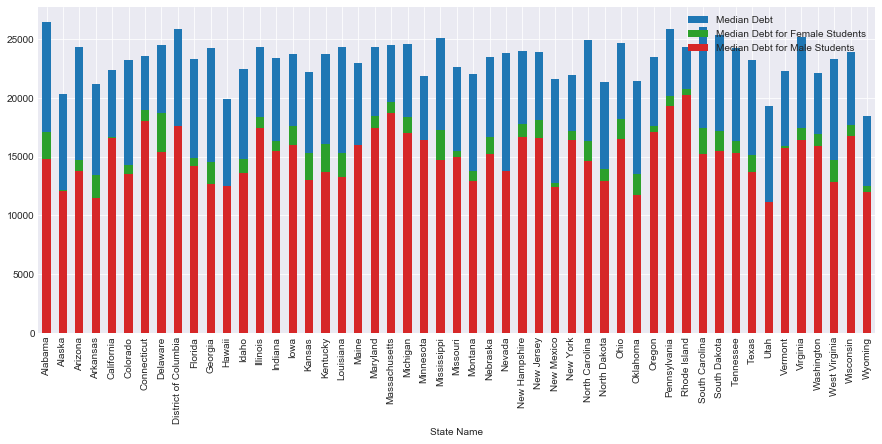

In [159]:
#df 
ax = csc_data_finaly.plot(x="State Name", y="Median Debt", kind="bar",figsize=(15,6))
csc_data_finaly.plot(x="State Name", y="Median Debt for Female Students", kind="bar", ax=ax, color="C2")
csc_data_finaly.plot(x="State Name", y="Median Debt for Male Students", kind="bar", ax=ax, color="C3")

plt.show()

In [160]:
plt.close()

# ttest

In [161]:
plt.close()

In [162]:
#Calculates the T-test for the mean of ONE group of scores.
#This is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent 
#observations a is equal to the given population mean, popmean.
#Test if mean of random sample is equal to true mean, and different mean. 
#We reject the null hypothesis in the second case and don’t reject it in the first case.

In [163]:
# Generate some data to test with
def gendata(loc=0):
    population = csc_data_final['Median Debt']
    sample = population.sample(frac =.25) 
    
    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population)), population, label="population")
    plt.scatter(range(len(sample)), sample, label="sample")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population, 20, density=True, alpha=0.7, label="population")
    plt.hist(sample, 20, density=True, alpha=0.7, label="sample")
    plt.axvline(population.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(sample.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population, sample

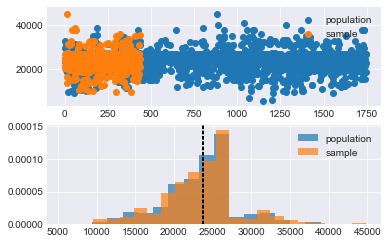

In [164]:
# Generate some data and show the scatter plot
population, sample = gendata()
#plt.show()

In [165]:
stats.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=0.30364033064063417, pvalue=0.7615467656835495)

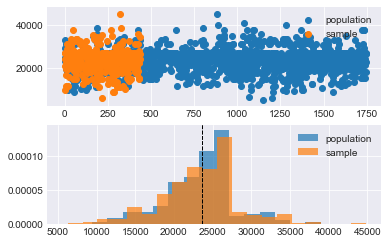

In [166]:
# Generate data with a bigger difference in means
population, sample = gendata(loc=-5000)

In [167]:
stats.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=-0.10209824566224068, pvalue=0.9187256316741097)

In [168]:
plt.close()

In [ ]:
plt.close()

In [169]:
csc_data_final2 =pd.DataFrame(csc_data_final.groupby(['State Name'])['Median Debt with income between 0-30k', 
                                                                      'Median Debt with income between 30,001-75k', 
                                                                      'Median Debt with income greater than 75k',
                                                                      'Cost of Attendance'].mean())
csc_data_final2 =csc_data_final2.reset_index()
csc_data_final2.head() 

,State Name,Median Debt with income between 0-30k,"Median Debt with income between 30,001-75k",Median Debt with income greater than 75k,Cost of Attendance
0,Alabama,16037.482759,16773.620690,15178.551724,27061.413793
1,Alaska,13405.000000,11387.250000,12405.500000,21517.250000
2,Arizona,13495.904762,15570.047619,15297.904762,28052.238095
3,Arkansas,11882.272727,12674.363636,12446.545455,26301.590909
4,California,16827.017699,16978.495575,16770.424779,40520.769912


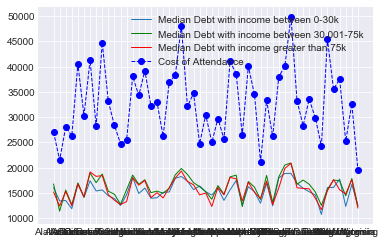

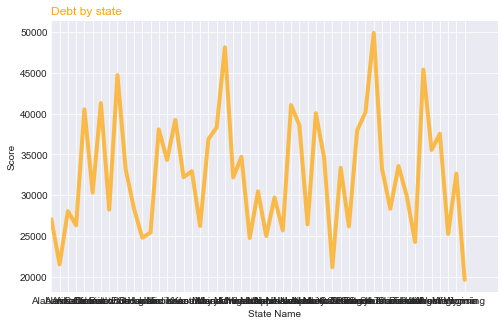

In [170]:
# SHould work fine -------> I don't know way is not!!!!!!!!!!!!!!!!!

#df = csc_data_final({'x':  'State Name', 
                    # 'y1': 'Median Debt with income between 0-30k', 
                     #'y2': 'Median Debt with income between 30,001-75k', 
                     #'y3': 'Median Debt with income greater than 75k',
                     #'y4' : 'Cost of Attendance'})

#plt.style.use('fivethirtyeight')
plt.subplots()

# multiple line plot
plt.plot( 'State Name', 'Median Debt with income between 0-30k', data=csc_data_final2, marker='', markerfacecolor='skylighblue',linewidth=1,)
plt.plot( 'State Name', 'Median Debt with income between 30,001-75k', data=csc_data_final2, marker='', color='green', linewidth=1)
plt.plot( 'State Name', 'Median Debt with income greater than 75k', data=csc_data_final2, marker='', color='red', linewidth=1, )
plt.plot( 'State Name', 'Cost of Attendance', data=csc_data_final2, marker='o', color='blue', linewidth=1, linestyle='dashed', label="Cost of Attendance")
plt.legend()
#plt.style.use('fivethirtyeight')
plt.style.use('seaborn-darkgrid')
#my_dpi=96
plt.figure(figsize=(8,5) )
 
# multiple line plot
#for column in csc_data_final2.drop('State Name', axis=1):
#plt.plot(csc_data_final2['State Name'], csc_data_final2[columns], marker='', color='grey', linewidth=1, alpha=0.4)
 
# Now re do the interesting curve, but biger with distinct color
plt.plot(csc_data_final2['State Name'], csc_data_final2['Cost of Attendance'], marker='', color='orange', linewidth=4, alpha=0.7)
 
# Change xlim
plt.xlim(0,54)
 
# Let's annotate the plot
#num=0
#for i in csc_data_final2.values[5][1:]:
   # num+=1
   # name=list(df)[num]
    #if name != 'Cost of Attendance':
    #plt.text(10.2, i, name, horizontalalignment='left', size='small', color='grey')
 
 # And add a special annotation for the group we are interested in
#plt.text(10.2, csc_data_final2.Cost of Attendance.tail(1), 'Mr Orange', horizontalalignment='left', size='small', color='orange')
 
# Add titles
#plt.xticks(plt.xlabel("State Name"),csc_data_final2, rotation = 'vertical' )
plt.title("Debt by state", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("State Name")
plt.ylabel("Score")
#plt.tight_layout()

plt.show()

In [ ]:
fig = plt.figure()

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(211)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(212)

#combined_data_cap_df = combined_data_cap_df.loc[combined_data_cap_df['Mouse ID'] == 's185']
#tumor_vols_mean_df = combined_data_cap_df .groupby(["Drug Regimen", "Timepoint"]).mean()["Tumor Volume (mm3)"]

csc_data_final=csc_data_final.loc[csc_data_final['State Name'] == 'Minnesota', 'California','Massachusetts','Rhode Island' ]
#csc_data_finaly.groupby(['Completion Rate'])['Median Debt']
csc_data_finaly = csc_data_final.groupby('State Name').plot(x='State Name', y='Completion Rate', ax=ax1, figsize= (12,10))
ax1.set_ylim((0,55000))
#ax1.yaxis.set_ticks([5, 10])
#ax1.xaxis.set_ticks([2007-8,2008-9, 2009-10, 2010-11,2011-12, 2012-13,2013-14,2014-15,2015-15,1016-17])
ax1.xaxis.set_label_text("Student Size")
ax1.set_title("Completion Rate")
#plt.legend(['California', 'Florida', 'Massachusetts','Minnesota','Washington'],
          # loc='upper right')
#ax1.set_legend((line1, line2, line3,line4), ('Minnesota', 'Massachusetts', 'Washington','Florida','California'))

csc_data_final.groupby('State Name')['Median Debt'].mean().sort_values().plot(kind='barh', ax=ax2, figsize=(12,10))
ax2.yaxis.set_label_text("States")
ax2.set_title("Median Debt on average")
fig.subplots_adjust(hspace=0.5)

<IPython.core.display.Javascript object>


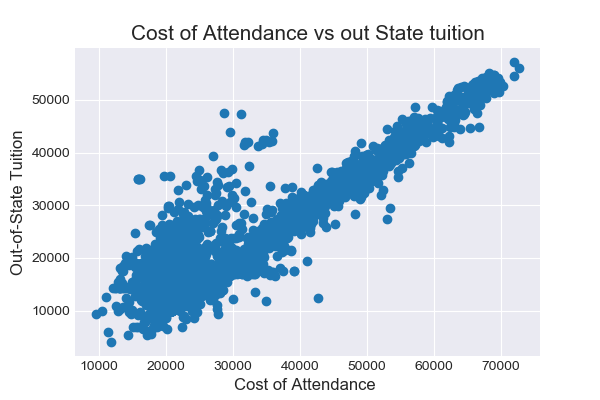

In [13]:

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


weights_mean_df = csc_data_final['Cost of Attendance']
tumor_mean_df = csc_data_final['Out-of-State Tuition']
tumor_mean_df 
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(weights_mean_df, tumor_mean_df )
ax.set_xlabel('Cost of Attendance ',fontsize=12)
ax.set_ylabel('Out-of-State Tuition',fontsize=12)
ax.set_title("Cost of Attendance vs out State tuition",fontsize=15);
plt.show()

0       32163.899433
1       19555.992589
2       28165.692503
3       19431.941546
4       16794.114593
            ...     
1743    34187.046498
1744    45726.581157
1745    37303.654724
1746    21598.653302
1747    15870.700931
Name: Cost of Attendance, Length: 1748, dtype: float64
y = 0.7x + 2200.69


<IPython.core.display.Javascript object>


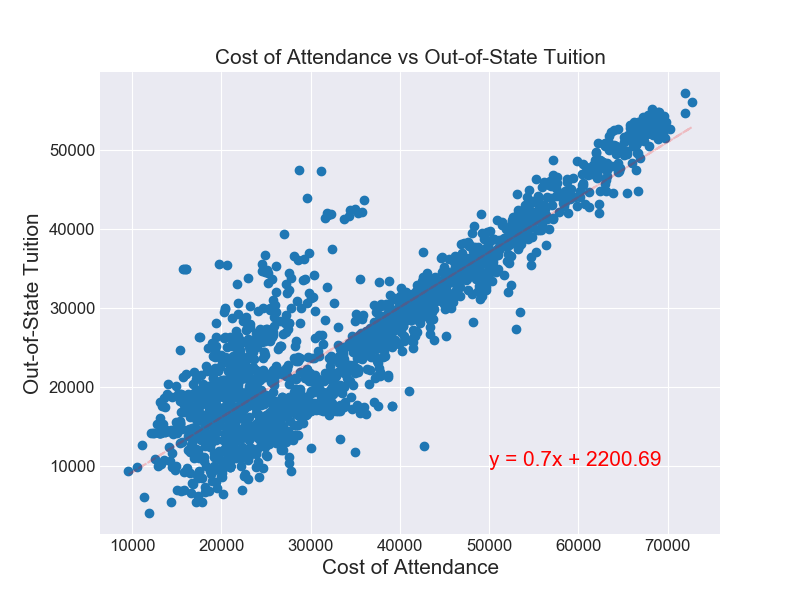

The correlation between Cost of Attendance and  Out-of-State Tuition is: 0.8978778752901303


In [14]:
# Calculate the correlation coefficient and linear regression model for Cost of Attendance and Out-of-State Tuition
one_df = csc_data_final['Cost of Attendance']
two_df = csc_data_final['Out-of-State Tuition']
#two_df 
#fig, ax = plt.subplots(figsize=(6,4))
#ax.scatter(one_df, two_df )
#ax.set_xlabel('Cost of Attendance ',fontsize=12)
#ax.set_ylabel('Out-of-State Tuition',fontsize=12)
#ax.set_title("Cost of Attendance vs out State tuition",fontsize=15);


(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(weights_mean_df, tumor_mean_df)
regress_values = weights_mean_df * slope + intercept
print(regress_values)

# Create line equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Plot the linear model with scatter plot
plt.figure(figsize=(8,6))
plt.scatter(one_df, two_df)
plt.plot(one_df, regress_values, 'r--', alpha=0.2)

# Label plot and annotate the line equation
plt.annotate(line_eq,(50000,10000),fontsize=15,color="red")
plt.xlabel('Cost of Attendance', size=15)
plt.ylabel('Out-of-State Tuition', size=15)
plt.title('Cost of Attendance vs Out-of-State Tuition', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
print(f"The correlation between Cost of Attendance and  Out-of-State Tuition is: {rvalue}")

plt.show()

0       30122.449345
1       13514.957116
2       24855.897860
3       13351.553566
4        9876.933142
            ...     
1743    32787.396000
1744    47987.598107
1745    36892.680686
1746    16205.607700
1747     8660.586495
Name: Cost of Attendance, Length: 1748, dtype: float64
y = 0.92x + -9345.93


<IPython.core.display.Javascript object>


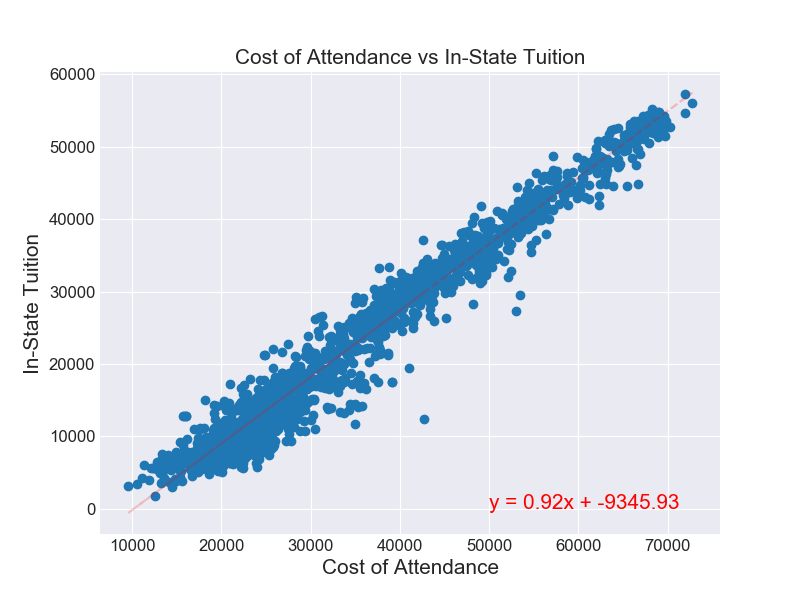

The correlation between Cost of Attendance and  In-State Tuition is: 0.9816713138974049


In [15]:
# Calculate the correlation coefficient and linear regression model for Cost of Attendance and Out-of-State Tuition
one1_df = csc_data_final['Cost of Attendance']
two1_df = csc_data_final['In-State Tuition']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(one1_df, two1_df)
regress_values = one1_df * slope + intercept
print(regress_values)

# Create line equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Plot the linear model with scatter plot
plt.figure(figsize=(8,6))
plt.scatter(one1_df, two1_df)
plt.plot(one_df, regress_values, 'r--', alpha=0.2)

# Label plot and annotate the line equation
plt.annotate(line_eq,(50000,0),fontsize=15,color="red")
plt.xlabel('Cost of Attendance', size=15)
plt.ylabel('In-State Tuition', size=15)
plt.title('Cost of Attendance vs In-State Tuition', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
print(f"The correlation between Cost of Attendance and  In-State Tuition is: {rvalue}")

plt.show()

0       0.581555
1       0.436739
2       0.535631
3       0.435315
4       0.405016
          ...   
1743    0.604793
1744    0.737337
1745    0.640591
1746    0.460202
1747    0.394410
Name: Cost of Attendance, Length: 1748, dtype: float64
y = 0.0x + 0.24


<IPython.core.display.Javascript object>


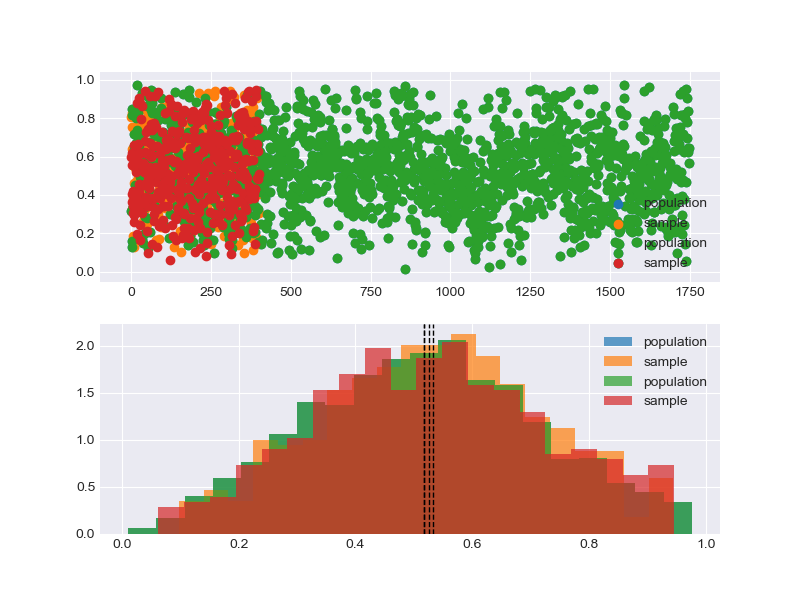

The correlation between Cost of Attendance and Completion Rate is: 0.6018209600689016


In [16]:
# Calculate the correlation coefficient and linear regression model for Cost of Attendance and Out-of-State Tuition
one2_df = csc_data_final['Cost of Attendance']
two2_df = csc_data_final['Completion Rate']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(one2_df, two2_df)
regress_values = one2_df * slope + intercept
print(regress_values)

# Create line equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Plot the linear model with scatter plot
plt.figure(figsize=(8,6))
plt.scatter(one2_df, two2_df)
plt.plot(one2_df, regress_values, 'r--', alpha=0.2)

# Label plot and annotate the line equation
plt.annotate(line_eq,(50000,0.0),fontsize=15,color="red")
plt.xlabel('Cost of Attendance', size=15)
plt.ylabel('Completion Rate', size=15)
plt.title('Cost of Attendance vs Completion Rate', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
print(f"The correlation between Cost of Attendance and Completion Rate is: {rvalue}")

plt.show()